**ADITI NARESH VAITY** 
TASK -1 (Prediction using Supervised ML )

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Loading the Data**

In [ ]:
data_url = 'http://bit.ly//w-data'
hours = pd.read_csv(data_url)
print("Data Imported Succesfully")

Data Imported Succesfully


In [ ]:
hours.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Data Analysis**-**Number of hours student is studying** **scores** - **percentage** ** **of student based hours studied**

In [ ]:
hours.info()#summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
hours.describe() #descriptive statistics od data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs Percentage')

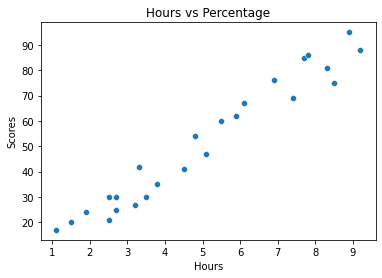

In [ ]:
sns.scatterplot( x ='Hours' ,y ='Scores' ,data=hours )
plt.title("Hours vs Percentage")

As we can clearly see there is the positive linear trend betwee number of hours studied ans percentages of score

**Splitting Data to train and test**

In [ ]:
X= hours.drop(['Scores'],axis =1)
y=hours['Scores'] #target variable

Now

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split (X,y, test_size=0.2,random_state=0)

print("Train Data (Independent variables):",X_train.shape)
print("Test Data (Independent variables):", X_test.shape)
print("Train Data (Dependent variables):",y_train.shape)
print("Test Data (Dependent variables):",y_test.shape)

Train Data (Independent variables): (20, 1)
Test Data (Independent variables): (5, 1)
Train Data (Dependent variables): (20,)
Test Data (Dependent variables): (5,)


**since there is relation between our dependent and target variable linear regression model will suffice to predict the outcome**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [ ]:
intercept = regressor.intercept_ # b0
slope = regressor.coef_ # b1
print(f"b0 = {intercept},b1 ={slope}")

b0 = 2.018160041434662,b1 =[9.91065648]


**we can check the linearity of variables plotting below graph**

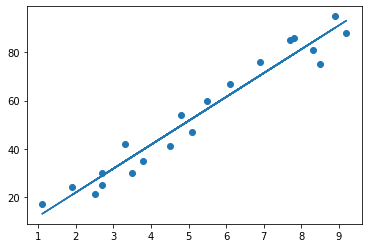

In [ ]:
line = intercept + slope*X_train
plt.scatter (X_train,y_train)
plt.plot(X_train,line)
plt.show()

**Make Predictions using model**

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actua Values vs Prdicted values
df = pd.DataFrame({'Actual' :y_test, 'Predicted' :y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


**Actual Percentages are close to predicted Percentages**

**Evaluating the Model**

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002982

In [ ]:
score = regressor.score(X_test,y_test)
print("Accuracy of test data is:",score)

Accuracy of test data is: 0.9454906892105354


Text(0.5, 1.0, 'Actual vs Predicted Scores')

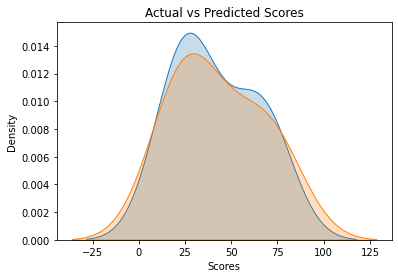

In [ ]:
sns.kdeplot(y_test,label='Actual',shade=True)
sns.kdeplot(y_pred,label='Predicted',shade=True)
plt.title("Actual vs Predicted Scores")

In [ ]:
hours = float(input("Enter the number of hours the student studies to predict score:"))
score = regressor.predict(np.array(hours).reshape(-1,1))
print(f"Predicted Score:{score[0]:2f}")

Enter the number of hours the student studies to predict score:9.25
Predicted Score:93.691732
